In [1]:
!pip install keras 

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from keras.backend.tensorflow_backend import set_session
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)sess = tf.Session(config=config)set_session(sess)
sess = tf.Session(config=config)
set_session(sess) 

Using TensorFlow backend.


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.optimizers import Adam as Adam
from keras.optimizers import SGD
from tensorflow.keras.models import load_model

In [4]:
import keras
from classification_models.keras import Classifiers

ResNet18, preprocess_input = Classifiers.get('resnet18')
n_classes=1


In [5]:

base_model = ResNet18(input_shape=(224,224,3), weights='resnet18_imagenet_1000_no_top.h5', include_top=False)


Instructions for updating:
Colocations handled automatically by placer.
222


In [6]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 224, 224, 3)  9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
____________________________________________________________________________________________

In [9]:
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(rescale = 1./255,
                                     rotation_range=10,  
                                     zoom_range = 0.1, 
                                     width_shift_range=0.2,  height_shift_range=0.2) 

In [10]:
train_data= train_generator.flow_from_directory(
                                                batch_size=256,directory="/raid/Data/Master_Dataset/elvin/final_mix/train",
                                                shuffle=True,class_mode="binary",target_size=(224,224))

Found 948603 images belonging to 2 classes.


In [11]:
train_data.class_indices

{'fake': 0, 'real': 1}

In [12]:

validation_generator=ImageDataGenerator(rescale = 1./255)

In [13]:
val_data= validation_generator.flow_from_directory(
                                              directory="/raid/Data/Master_Dataset/elvin/final_mix/validation",
                                              shuffle=True,batch_size=32,class_mode="binary",target_size=(224,224))

Found 518144 images belonging to 2 classes.


In [14]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=.5, min_lr=0.00001)

In [13]:
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
    # Extra Layers
    
#     x0 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(base_model.output)
#     x  = keras.layers.GlobalAveragePooling2D()(x0) 
#     x1 = keras.layers.Dropout(0.4)(x)
#     x2 = keras.layers.Dense(512, activation='relu')(x1)
# #     x3 = keras.layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05)(x2)
#     x4 = keras.layers.Dropout(0.25)(x2)
#     x5 = keras.layers.Dense(256, activation='relu')(x4)
#     output = keras.layers.Dense(n_classes, activation='sigmoid')(x5)
#     model = keras.models.Model(inputs=[base_model.input], outputs=[output])    
#     model.summary()

In [15]:
from matplotlib import pyplot
import sys

In [16]:
def summarize_diagnostics(history,epoch):
    # plot loss
    pyplot.subplot(121)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    pyplot.ylabel('Loss')
    pyplot.xlabel('Epochs')

    # plot accuracy
    pyplot.subplot(122)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    pyplot.ylabel('Accuracy')
    pyplot.xlabel('Epochs')

    pyplot.subplots_adjust(top=0.92, bottom=0.2, left=0.0, right=2.5, hspace=0.25,
                    wspace=0.25)
    pyplot.show()    


    #     pyplot.subplot(213)
    # 	pyplot.title('Classification Accuracy')
    # 	pyplot.plot(history.history['accuracy'], color='blue', label='train')
    # 	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    filename = sys.argv[0].split('/')[-1]
    pyplot.savefig(filename +'FinalPaperResNet18'+str(epoch)+ '_plot.png')

Epoch 1/6
3705/3705 [==============================] - 12537s 3s/step - loss: 0.2293 - accuracy: 0.8987 - val_loss: 0.5939 - val_accuracy: 0.8150
Epoch 2/6
3705/3705 [==============================] - 12757s 3s/step - loss: 0.1133 - accuracy: 0.9551 - val_loss: 0.3697 - val_accuracy: 0.8003
Epoch 3/6
3705/3705 [==============================] - 11373s 3s/step - loss: 0.0887 - accuracy: 0.9655 - val_loss: 0.2755 - val_accuracy: 0.8525
Epoch 4/6
3705/3705 [==============================] - 11350s 3s/step - loss: 0.0714 - accuracy: 0.9723 - val_loss: 0.4821 - val_accuracy: 0.7925
Epoch 5/6
3705/3705 [==============================] - 16689s 5s/step - loss: 0.0627 - accuracy: 0.9758 - val_loss: 1.3516 - val_accuracy: 0.7496

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/6
3705/3705 [==============================] - 18742s 5s/step - loss: 0.0390 - accuracy: 0.9849 - val_loss: 0.4550 - val_accuracy: 0.8340


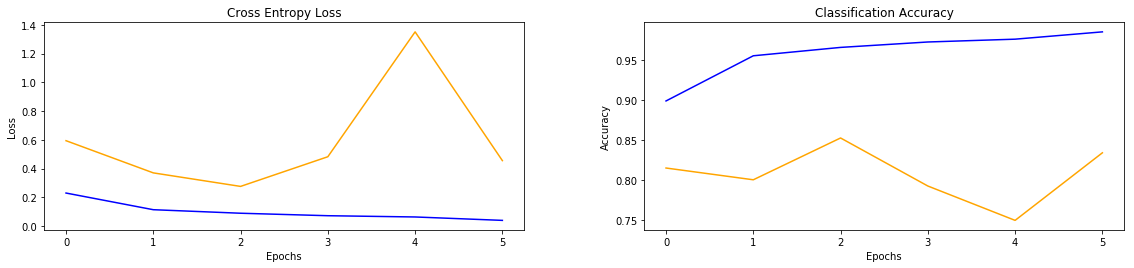

<Figure size 432x288 with 0 Axes>

In [18]:
from keras.utils import multi_gpu_model
from keras.models import load_model
from keras.optimizers import Adam as Adam
for y in [6]:
    #try:
    final_location=[]
    location=[]


# OPTIMIZER
#     Adam(lr=0.001)
#     x0 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(base_model.output)
#     x  = keras.layers.GlobalAveragePooling2D()(x0) 
#     x1 = keras.layers.Dropout(0.4)(x)
#     x2 = keras.layers.Dense(512, activation='relu')(x1)
# #     x3 = keras.layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05)(x2)
#     x4 = keras.layers.Dropout(0.25)(x2)
#     x5 = keras.layers.Dense(256, activation='relu')(x4)
#     output = keras.layers.Dense(n_classes, activation='sigmoid')(x5)
#     model = keras.models.Model(inputs=[base_model.input], outputs=[output])   
    
    model= Sequential()
    model.add(base_model)
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
    #model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.40))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.40))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    
    
    
    #model.summary()
#     model = load_model("Newdataset_ResNet18_4.hdf5")
    #sgd = (lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    #parallel_model = multi_gpu_model(model, gpus=3)
    model.compile(loss='binary_crossentropy',
                           optimizer=Adam(lr=0.001),metrics=["accuracy"])

    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
    
    history=model.fit_generator(generator=train_data,
                            steps_per_epoch=train_data.samples//train_data.batch_size,
                            validation_data=val_data,
                            verbose=1,
                            validation_steps=val_data.samples//val_data.batch_size,
                            epochs=y,callbacks=[learning_rate_reduction ])
    
    model.save("FinalPaper"+str(y)+".hdf5")
    summarize_diagnostics(history,y)
    loss=history.history['loss']
    acc=history.history['accuracy']
    valacc=history.history['val_accuracy']
    valloss=history.history['val_loss']
    location = [y,loss,acc,valacc, valloss]
    final_location.append(location)
    save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
    save1.to_csv('FinalPaperResNet18'+str(y)+'.csv')
    #except:
     #   continue

    



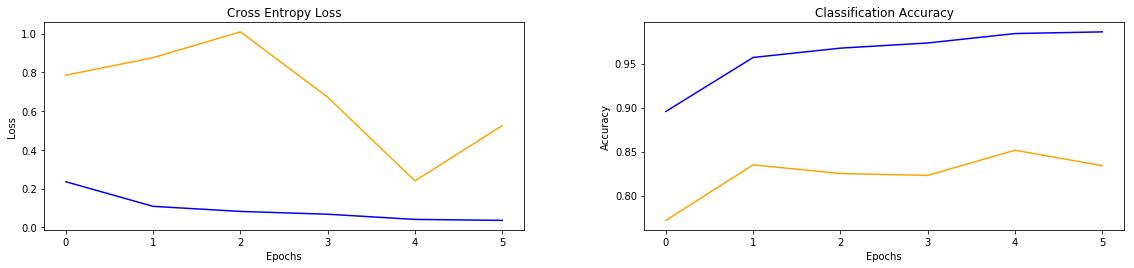

<Figure size 432x288 with 0 Axes>

In [21]:
summarize_diagnostics(history,y)

Epoch 1/4
3705/3705 [==============================] - 13645s 4s/step - loss: 0.0507 - accuracy: 0.9810 - val_loss: 0.8156 - val_accuracy: 0.7953
Epoch 2/4
3705/3705 [==============================] - 13413s 4s/step - loss: 0.0470 - accuracy: 0.9820 - val_loss: 0.0212 - val_accuracy: 0.8351
Epoch 3/4
3705/3705 [==============================] - 11866s 3s/step - loss: 0.0745 - accuracy: 0.9720 - val_loss: 0.3255 - val_accuracy: 0.8393
Epoch 4/4
3705/3705 [==============================] - 11222s 3s/step - loss: 0.0393 - accuracy: 0.9850 - val_loss: 0.5482 - val_accuracy: 0.7633


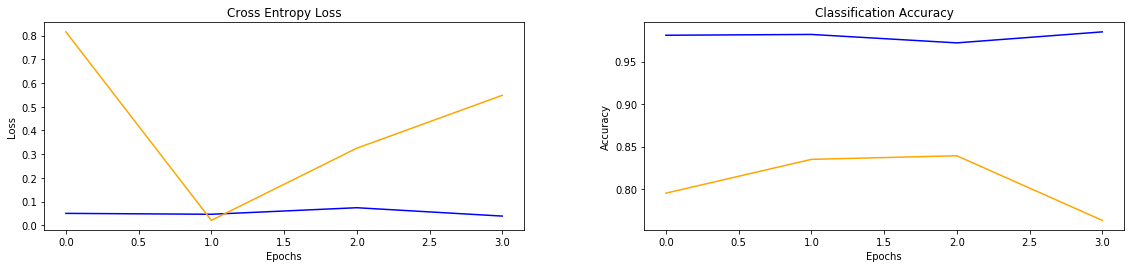

<Figure size 432x288 with 0 Axes>

In [22]:
from keras.utils import multi_gpu_model
from keras.models import load_model
from keras.optimizers import Adam as Adam
for y in [4]:
    #try:
    final_location=[]
    location=[]


# OPTIMIZER
#     Adam(lr=0.001)
#     x0 = keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(base_model.output)
#     x  = keras.layers.GlobalAveragePooling2D()(x0) 
#     x1 = keras.layers.Dropout(0.4)(x)
#     x2 = keras.layers.Dense(512, activation='relu')(x1)
# #     x3 = keras.layers.BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-05)(x2)
#     x4 = keras.layers.Dropout(0.25)(x2)
#     x5 = keras.layers.Dense(256, activation='relu')(x4)
#     output = keras.layers.Dense(n_classes, activation='sigmoid')(x5)
#     model = keras.models.Model(inputs=[base_model.input], outputs=[output])    
    
    
    
    model= Sequential()
    model.add(base_model)
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
    #model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.40))
    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    #model.add(BatchNormalization(axis=-1, momentum=0.1, epsilon=1e-04))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.40))
    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    
    
    
    
    
    #model.summary()
#     model = load_model("Newdataset_ResNet18_4.hdf5")
    #sgd = (lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    
    #parallel_model = multi_gpu_model(model, gpus=3)
    model.compile(loss='binary_crossentropy',
                           optimizer=Adam(lr=0.001),metrics=["accuracy"])

    #model.compile(optimizer=Adam(lr=0.001),loss="binary_crossentropy",metrics=["accuracy"])
    
    history=model.fit_generator(generator=train_data,
                            steps_per_epoch=train_data.samples//train_data.batch_size,
                            validation_data=val_data,
                            verbose=1,
                            validation_steps=val_data.samples//val_data.batch_size,
                            epochs=y,callbacks=[learning_rate_reduction,es])
    
    model.save("Latest_Super_ResNet18_Adamnew"+str(y)+".hdf5")
    summarize_diagnostics(history,y)
    loss=history.history['loss']
    acc=history.history['accuracy']
    valacc=history.history['val_accuracy']
    valloss=history.history['val_loss']
    location = [y,loss,acc,valacc, valloss]
    final_location.append(location)
    save1 = pd.DataFrame(final_location,columns=['epochs','loss','acc','valacc','valloss'])
    save1.to_csv('Latest_Super_epoch_ResNett18_Adamnew'+str(y)+'.csv')
    #except:
     #   continue

    



In [ ]:
# parallel_model.save("NEWdataset_RESNET_18.hdf5")

In [ ]:
#YE SAB KACHRA HAI 
# """""
# import numpy as np
# from tensorflow.keras.preprocessing import image
# prediction=np.array([])
# train_data.class_indices
# import os
# list=os.listdir('fakeframes')
# test_image = image.load_img("fakevideoframes/jpgframes/frame0.jpg", target_size = (224, 224))
# test_image = image.img_to_array(test_image)
# test_image = np.expand_dims(test_image, axis = 0)
# result = model.predict(test_image)
# print(result)   """"


# for name in list:
#     test_image = image.load_img("drive/My Drive/Internship/predict/"+name, target_size = (224, 224))
#     test_image = image.img_to_array(test_image)
#     test_image = np.expand_dims(test_image, axis = 0)
#     result = model.predict(test_image)
#     #training_set.class_indices
#     if result[0][0] == 1:
#         prediction=np.append(prediction,'akiec')
#     elif(result[0][1] == 1):
#         prediction=np.append(prediction,'bcc')
#     elif(result[0][2] == 1):
#         prediction=np.append(prediction,'bkl')
#     elif(result[0][3] == 1):
#         prediction=np.append(prediction,'df')
#     elif(result[0][4] == 1):
#         prediction=np.append(prediction,'mel')
#     elif(result[0][5] == 1):
#         prediction=np.append(prediction,'nv')
#     elif(result[0][6] == 1):
#         prediction=np.append(prediction,'vasc')
#     else:
#         prediction=np.append(prediction,'none')


In [ ]:
#         model= Sequential()
#         model.add(base_model)
#         model.add(Conv2D(512, (3, 3), activation = 'relu'))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         #model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Conv2D(64, (3, 3), activation = 'relu'))
#         model.add(MaxPooling2D(pool_size = (2, 2)))
#         model.add(Dropout(0.40))
#         model.add(Flatten())
#         model.add(Dense(512,activation='relu'))
#         model.add(Dropout(0.4))
#         model.add(Dense(1, activation='sigmoid'))



In [ ]:
# from tensorflow.keras.callbacks import ModelCheckpoint

# Save the model with best weights
# checkpointer = ModelCheckpoint('Xceptionbestweights1.hdf5', verbose=1,save_best_only=True)